# Analyzing Sales Strategies for Optimized Revenue

# 1-Introduction

The problem at hand revolves around the sales strategy for the office supplies company, Pens and Printers, specifically in relation to a new line of office stationery products they recently launched. The business has utilized three different sales strategies - email, call, and a combination of email and call - and is keen to understand which approach is the most effective. Critical queries that need addressing include: the customer count for each approach, revenue spread, any variations in revenue over time for each method, and a recommendation on the most beneficial sales method to persist with.

The dataset provided to assist in this analysis includes information such as the week the sale was made, the sales method applied, unique customer identifiers, the number of new products sold, the resulting revenue, the duration of the customer relationship with the company, number of website visits by the customer in the last 6 months, and the location of the customer. This data has not been pre-validated, thus a key initial step of our analysis will be to ensure the data is clean and fit for purpose.

The subsequent analysis will involve an exploratory analysis to answer the customer's queries, the definition of a business metric for ongoing monitoring, and the provision of recommendations for the business based on the findings. The ultimate purpose of this analysis is to determine the most effective sales method to optimize both customer engagement and revenue generation. This will be presented in a report to the Head of Analytics and a presentation for the sales rep.

# 2-Data Validation and Cleaning

## 2.1-Data Extraction

In [ ]:
import pandas as pd
url = "https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv"
rows_to_display = 5
df = pd.read_csv(url)

print(f'The data pertinent to our analysis has been sourced from the following link: {url}. For an initial glimpse into the dataset, we present the first {rows_to_display} records below.')
df.head(rows_to_display)

The data pertinent to our analysis has been sourced from the following link: https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv. For an initial glimpse into the dataset, we present the first 5 records below.


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## 2.2-Validating and cleaning data

Upon conducting a detailed examination of the dataset, the subsequent assessments and remedial measures were applied to each column:
 
"week" Column:
	• This numeric column represents the week when the sales transactions occurred
	• The data type is already suitably set as "int64"
	• All data points in the column are within the expected range of (1 - 6)


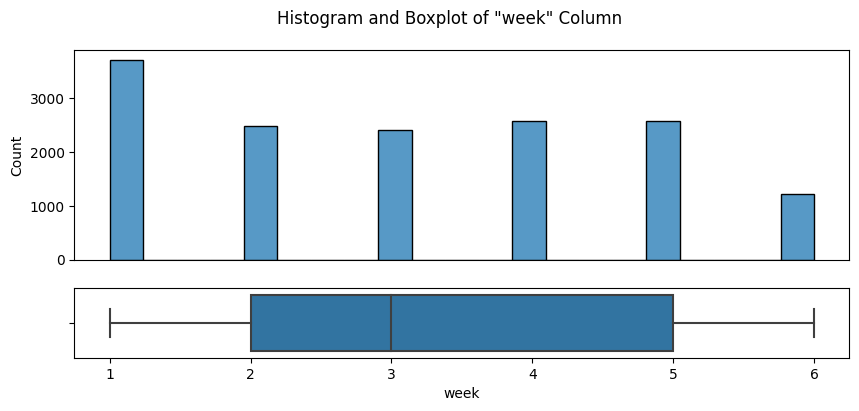

	• It does not contain any null values
 
"sales_method" Column:
	• This categorical column represents the method employed for sales
	• The data type is already suitably set as "object"
 	• Following entries within this column were not conforming to the expected values


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
22,3,em + call,d72de17a-0d71-401b-b64a-dc4492b2b1ed,10,150.47,20,21,North Carolina
603,1,em + call,622b3c27-c6a3-4796-a89e-010599a21ee8,8,126.02,10,19,Ohio
954,5,em + call,c07b5315-e4aa-4f8c-ad2f-b12ac74dcca0,13,NaN,9,30,California
1260,4,em + call,0829c4e8-a3d4-49b3-947e-b5bde2ec2c0b,12,181.52,22,28,Maryland
1674,5,em + call,b2a5de5e-a76d-4e3f-b31c-cc82f0432cad,12,185.65,3,28,Washington
1693,1,email,39e91aab-35a9-42e7-aa5e-c20da21752ca,10,95.39,1,22,California
2174,3,email,62e90458-5a17-4ef8-bc1c-7a44a154c731,9,92.19,4,26,Indiana
3598,4,em + call,3325c590-486b-4a00-83b5-2f1d1fe6e607,12,176.85,11,34,Minnesota
3601,2,em + call,5c6a43b9-baec-4634-9554-4321f74eb44c,10,152.61,2,23,Pennsylvania
3635,3,em + call,8e445cdf-fd7c-4a3f-bd23-5e474bffd660,10,146.77,1,22,Texas


	• "em + call" was replaced with "Email + Call"
	• "email" was replaced with "Email"
	• It does not contain any null values
 
"customer_id" Column:
	• This column indicates a unique identifier used to track each customers
	• The data type is already suitably set as "object"
	• It does not contain any null values
 
"nb_sold" Column:
	• This column records the number of products sold
	• The data type is already suitably set as "int64"
	• All data points in the column are within the expected range of (0 - inf)


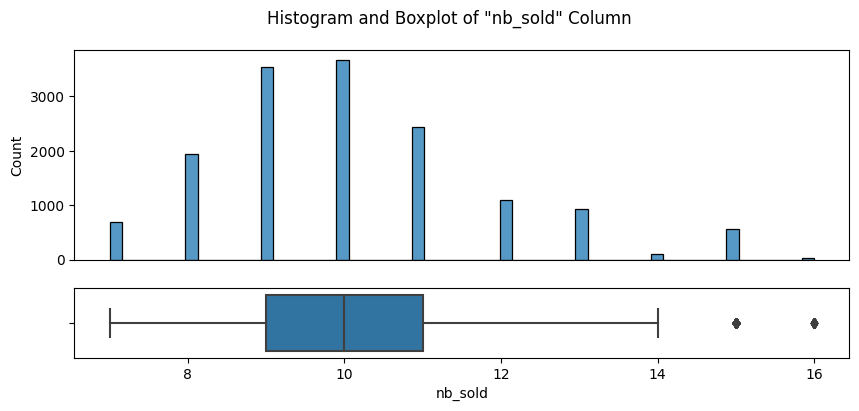

	• It does not contain any null values
 
"revenue" Column:
	• This column indicates The total amount of money generated from the sale
	• The data type is already suitably set as "float64"
	• All data points in the column are within the expected range of (0 - inf)


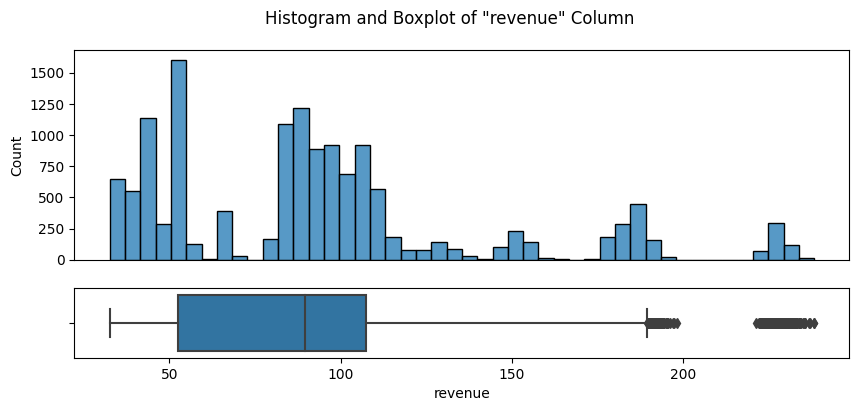

 	• it contains "1074" null entries
	• With a high missing data rate (7.16%) in "revenue", we used the "nb_sold" column, the one with highest correlation
	 of 0.7, for imputation. This method helps to maintain a more accurate data distribution.
 	• The data distribution after the management of missing values:


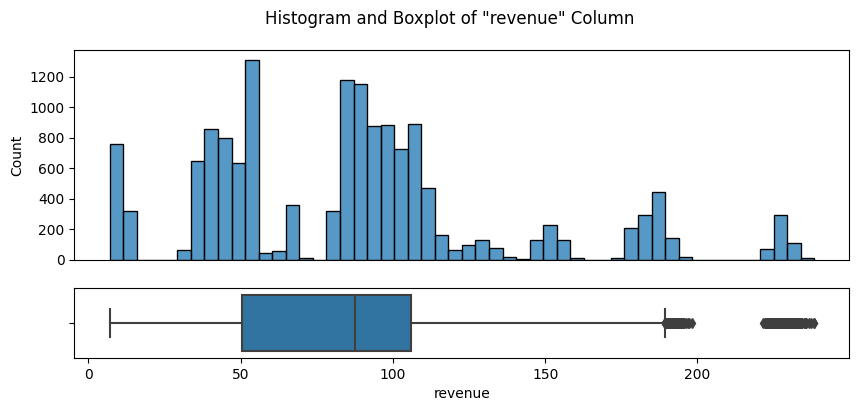

 
"years_as_customer" Column:
	• This column specifies the duration for which an individual has been a customer
	• The data type is already suitably set as "int64"
 	• Following entries in this column exceed the expected range of (0-39)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


	• These entries have been replaced with null values.


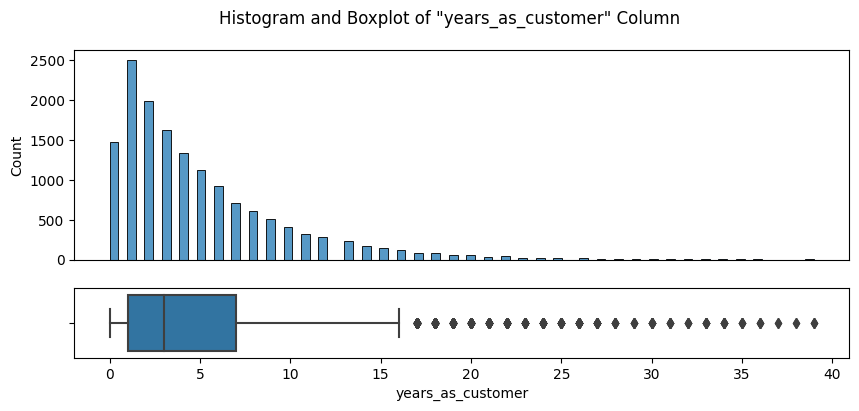

 	• it contains "2" null entries
	• Given the low proportion (0.013333333333333334%) of missing data in "years_as_customer", rows with null values were dropped to ensure data integrity.
 	• The data distribution after the management of missing values:


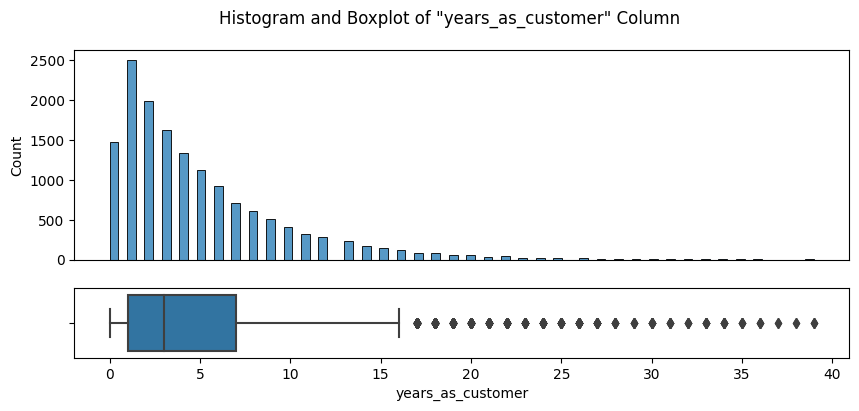

 
"nb_site_visits" Column:
	• This column quantifies the frequency of customer visits
	• The data type is already suitably set as "int64"
	• All data points in the column are within the expected range of (0 - inf)


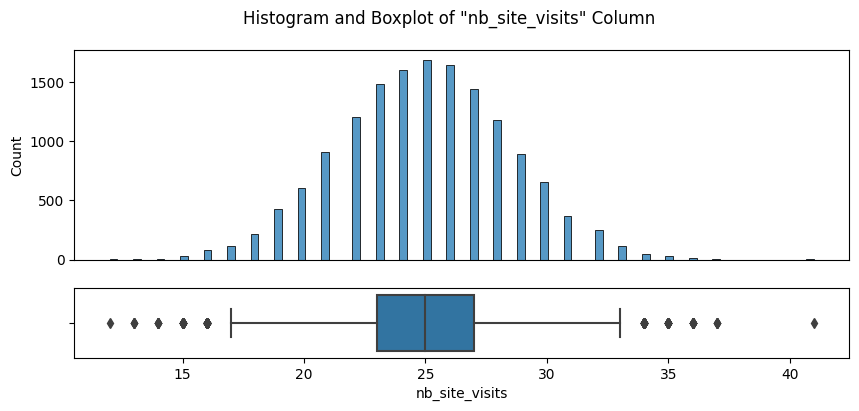

	• It does not contain any null values
 
"state" Column:
	• This column captures the location of our customers
	• The data type is already suitably set as "object"
	• All data points in the column match the expected values
	• It does not contain any null values
 


In [ ]:
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from difflib import get_close_matches
from sklearn.impute import SimpleImputer

#Calculating the company age:
year_founded = 1984
company_age = date.today().year - year_founded

# Define confidence interval:
ci = 0.95

# Define a dictionary to map column names to their desired validation parameters
column_validation_parameters = {
    'week' : [[1,6],
              'int64',
              'This numeric column represents the week when the sales transactions occurred'],
    'sales_method' : [['Email', 'Email + Call', 'Call']
                      ,'object',
                      'This categorical column represents the method employed for sales'],
    'customer_id' : ['all',
                     'object',
                     'This column indicates a unique identifier used to track each customers'],
    'nb_sold' : [[0,float('inf')],
                 'int64',
                 'This column records the number of products sold'],
    'revenue' : [[0,float('inf')],
                 'float64',
                 'This column indicates The total amount of money generated from the sale'],
    'years_as_customer' : [[0, company_age],
                           'int64',
                           'This column specifies the duration for which an individual has been a customer'],
    'nb_site_visits' : [[0,float('inf')],
                        'int64',
                        'This column quantifies the frequency of customer visits'],
    'state' : [['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
                'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
                'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
                'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
                'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
                'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
                'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
                'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
                'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
                'West Virginia', 'Wisconsin', 'Wyoming'],
               'object',
               'This column captures the location of our customers']
}
# Function to ensure data type consistency and perform conversions if needed
def check_and_convert_data_type(df, column, parameters):
    if df[column].dtype == parameters[1]:
        print(f'\t\u2022 The data type is already suitably set as "{df[column].dtype}"')
    else:
        try:
            df[column] = df[column].astype(parameters[1])
            print(f'\t\u2022 Data type for "{column}" column has been converted from "{df[column].dtype}" to "{parameters[1]}"')
        except ValueError:
            raise ValueError(f'Conversion failed for column "{column}". Unable to convert to "{parameters[1]}" due to incompatible data.')
    return df

# Function to validate column data based on predefined parameters
def validate_data(df, column, parameters):
    if parameters[0] != 'all':
        if np.issubdtype(df[column].dtype, np.number):
            min_value, max_value = parameters[0]
            out_of_range_data = df[(df[column] < min_value) | (df[column] > max_value)]
            if not out_of_range_data.empty:
                print("\033[91m {}\033[00m" .format(f'\t\u2022 Following entries in this column exceed the expected range of ({min_value}-{max_value})'))
                display(out_of_range_data)
                df.loc[(df[column] < min_value) | (df[column] > max_value), column] = None
                print('\t\u2022 These entries have been replaced with null values.')
            else:
                print(f'\t\u2022 All data points in the column are within the expected range of ({min_value} - {max_value})')
            plot_data_distribution(df, column)

        elif df[column].dtype == np.object:
            invalid_data = df[~df[column].isin(parameters[0])]
            #print(invalid_data)
            if not invalid_data.empty:
                print("\033[91m {}\033[00m" .format(f'\t\u2022 Following entries within this column were not conforming to the expected values'))
                display(invalid_data)
                # replace invalid values with the closest match
                df = replace_with_closest_match(df, column, parameters[0])
            else:
                print(f'\t\u2022 All data points in the column match the expected values')
    return df

# Function to plot the data distribution for numeric data
def plot_data_distribution(df, column):
    fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.75, .25)}, figsize=(10, 4))
    sns.histplot(data=df, x=column, ax=ax[0])
    sns.boxplot(data=df, x=column, ax=ax[1])
    ax[0].set(xlabel=' ')
    ax[0].set_xticks([])
    fig.suptitle(f'Histogram and Boxplot of "{column}" Column')
    plt.show()

def replace_with_closest_match(df, column, valid_values):
    # Get unique invalid values in the column
    unique_invalid_values = df.loc[~df[column].isin(valid_values), column].unique()

    for invalid_value in unique_invalid_values:
        # Get the closest match within valid values
        closest_match = get_close_matches(invalid_value, valid_values, n=1)
        if closest_match:  # if there is a match
            closest_match = closest_match[0]
            # Replace the invalid value with the closest valid one
            df.loc[df[column] == invalid_value, column] = closest_match
            print(f'\t\u2022 "{invalid_value}" was replaced with "{closest_match}"')
        else:  # if there isn't a match
            print("\033[91m {}\033[00m" .format(f'\t\u2022 No close match found for "{invalid_value}"!'))
    return df

def handle_missing_values(df, column, threshold):
    total_rows = df.shape[0]
    null_count = df[column].isnull().sum()
    null_percentage = (null_count / total_rows) * 100

    if null_percentage > 0 and null_percentage < threshold:
        df = df.dropna(subset=[column])
        print(f'\t\u2022 Given the low proportion ({null_percentage}%) of missing data in "{column}", rows with null values were dropped to ensure data integrity.')
    elif null_percentage >= threshold:
        # Remove rows where the target column and all related columns are null, to avoid bias in the correlation calculation
        df_dropped = df.dropna(subset=[column], how='all')

        correlations = df_dropped.corr()[column].sort_values(ascending=False)
        most_correlated_column = correlations.index[1]  # index 0 is the column itself

        df[column].fillna(df[most_correlated_column], inplace=True)
        print(f'\t\u2022 With a high missing data rate ({null_percentage}%) in "{column}", we used the "{most_correlated_column}" column, the one with highest correlation')
        print(f'\t of {round(correlations[1],2)}, for imputation. This method helps to maintain a more accurate data distribution.')

    print("\033[91m {}\033[00m" .format(f'\t\u2022 The data distribution after the management of missing values:'))
    plot_data_distribution(df, column)

    return df

# Function to check and handle null values in the dataframe
def check_handle_null_values(df, column, threshold):
    if df[column].isnull().sum() > 0:
        print("\033[91m {}\033[00m" .format(f'\t\u2022 it contains "{df[column].isnull().sum()}" null entries'))
        df = handle_missing_values (df, column, threshold)
    else:
        print(f'\t\u2022 It does not contain any null values')
    return df


print("Upon conducting a detailed examination of the dataset, the subsequent assessments and remedial measures were applied to each column:")
print(' ')
for column, parameters in column_validation_parameters.items():
    print(f'"{column}" Column:')
    print(f'\t\u2022 {parameters[2]}')
    df = check_and_convert_data_type(df, column, parameters)
    df = validate_data(df, column, parameters)
    df = check_handle_null_values(df, column, 1-ci)
    print(' ')


# 3-Exploratory Analysis

## 3.1-Drivers of Revenue

Upon examining the heatmap, it is evident that the "revenue" column shares the most significant correlations with the following columns, in order: sales_method, nb_sold, week, nb_site_visits.


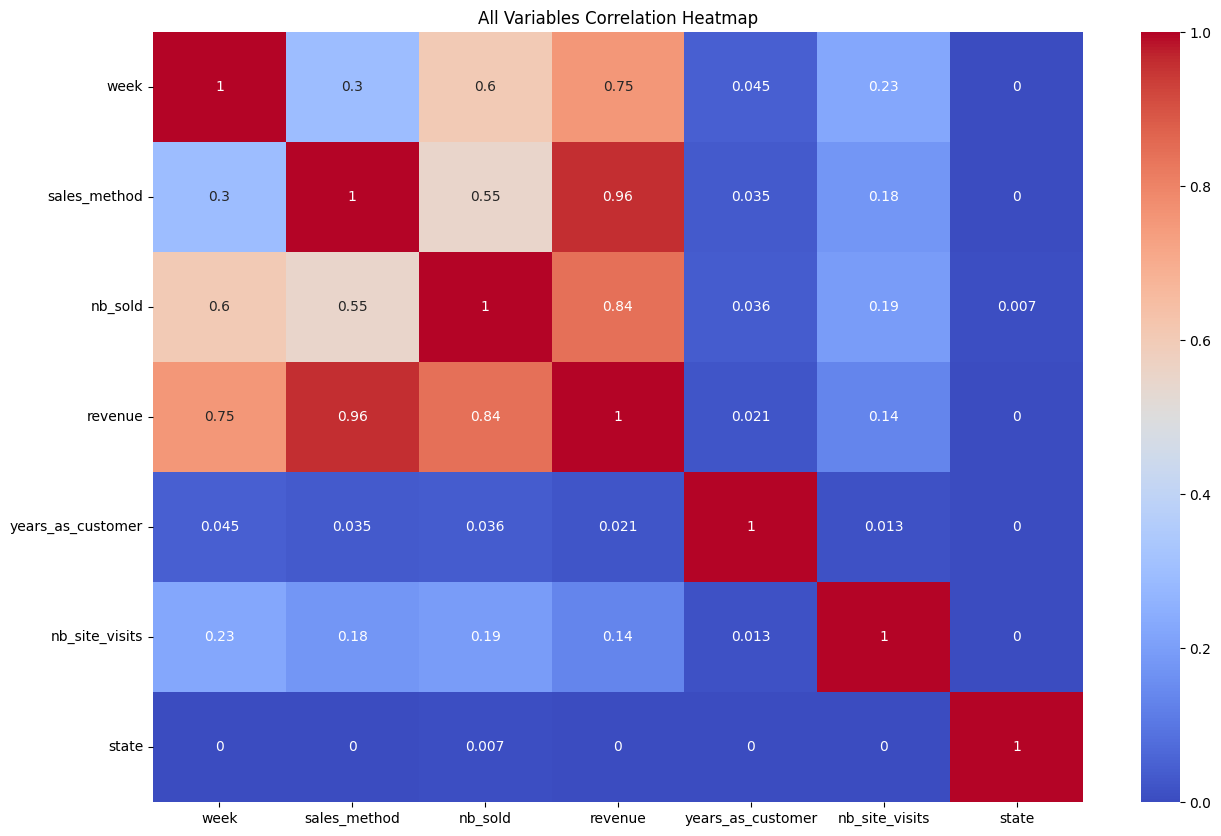

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute Cramer's V
def compute_cramers_v(var1, var2):
    # Construct confusion matrix
    confusion_matrix = pd.crosstab(var1, var2)

    # Apply Chi-square test of independence
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    total = confusion_matrix.sum().sum()
    phi2 = chi2 / total

    # Determine shape of confusion matrix
    rows, cols = confusion_matrix.shape

    # Adjust phi2 value
    phi2_adj = max(0, phi2 - ((cols-1)*(rows-1))/(total-1))
    row_adj = rows - ((rows-1)**2)/(total-1)
    col_adj = cols - ((cols-1)**2)/(total-1)

    return np.sqrt(phi2_adj / min((col_adj-1), (row_adj-1)))

# Function to generate a heatmap using selected DataFrame columns
def generate_heatmap(data, selected_cols, target, bins):
    # Select desired columns
    selected_data = data[selected_cols]

    # Bin numerical columns
    for col in selected_data.select_dtypes(include=np.number).columns:
        selected_data[col] = pd.qcut(selected_data[col], q=bins, duplicates='drop')

    # Initialize correlation matrix
    correlation_matrix = pd.DataFrame(index=selected_data.columns, columns=selected_data.columns)

    # Compute correlation for each pair of columns
    for i in range(0, len(selected_data.columns)):
        for j in range(0, len(selected_data.columns)):
            if selected_data.iloc[:, i].nunique() > 1 and selected_data.iloc[:, j].nunique() > 1:  # Exclude constant columns
                correlation_matrix.iloc[i, j] = compute_cramers_v(selected_data.iloc[:, i], selected_data.iloc[:, j])
            else:
                correlation_matrix.iloc[i, j] = np.nan

    # Convert correlation matrix to numeric
    correlation_matrix = correlation_matrix.apply(pd.to_numeric, errors='coerce')

    # Identify the columns with the highest correlation to the target column
    most_correlated_cols = correlation_matrix.nlargest(5, target)[target].index.tolist()
    most_correlated_cols.remove(target)  # Exclude the target itself

    # Print a description
    print(f'Upon examining the heatmap, it is evident that the "{target}" column shares the most significant correlations with the following columns, in order: {", ".join(most_correlated_cols)}.')


    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("All Variables Correlation Heatmap")
    plt.show()

# Specify columns for the heatmap
target = 'revenue'
column_list = ['week', 'sales_method', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits', 'state']

# Invoke function to create heatmap
generate_heatmap(df, column_list, target, 100)


## 3.2-Revenue and Number of Customers for Each Approach

The bar charts display customer and revenue data for three sales strategies: Email, Email + Call, and Call. Email strategy,  has the most customers, and had generates the highest revenue. Despite a high customer count, the Call strategy yielded the least revenue and we also know that it has high costs. The Email + Call strategy has fewer customers but outperforms Call alone in revenue, suggesting the efficiency of incorporating emails. However, more detailed analysis is necessary for definitive conclusions.

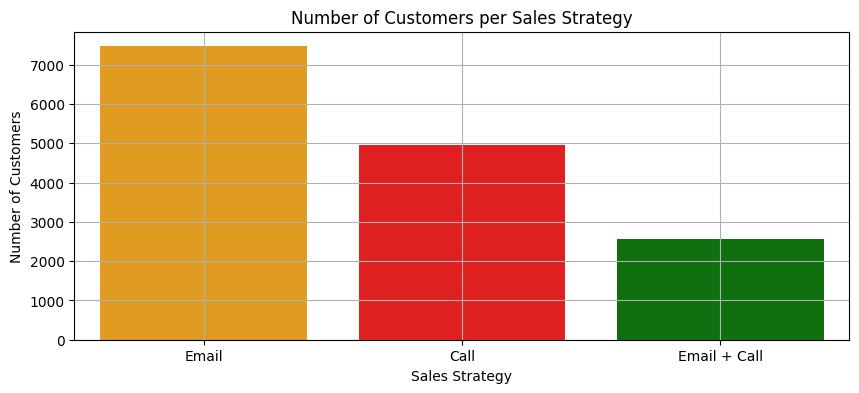

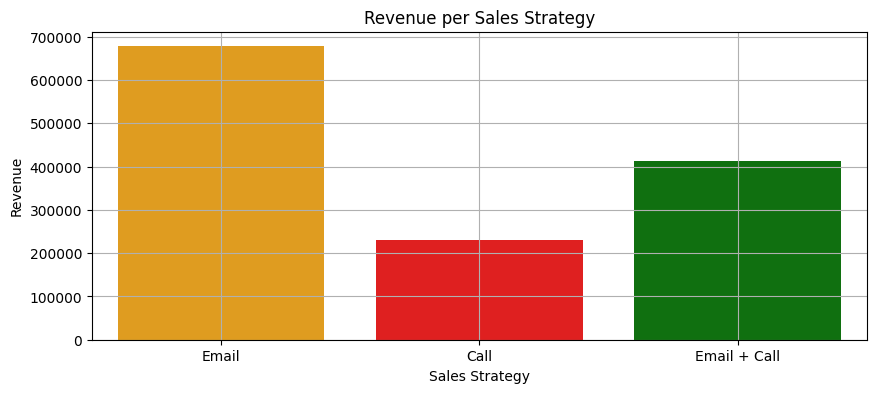

In [ ]:
# Define a color scheme to distinguish various sales strategies
palette = {"Email": "Orange", "Call": "red", "Email + Call": "green"}

# Sort sales strategies by their occurrence
strategies_sorted_by_frequency = df['sales_method'].value_counts().index


distinct_strategies = df['sales_method'].unique()
plt.figure(figsize=(10, 4))
sns.countplot(data = df, x="sales_method", order=strategies_sorted_by_frequency, palette=palette)
plt.ylabel('Number of Customers')
plt.xlabel('Sales Strategy')
plt.title('Number of Customers per Sales Strategy')
plt.grid(True)
plt.show()


revenue_overview = df.groupby(["sales_method"])["revenue"].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=revenue_overview, x="sales_method", y="revenue", palette=palette, order=strategies_sorted_by_frequency)
plt.ylabel('Revenue')
plt.xlabel('Sales Strategy')
plt.title('Revenue per Sales Strategy')
plt.grid(True)
plt.show()



## 3.3-Overal Revenue Spread and Breakdown by Sales Method

After a careful analysis of the Kernel Density Estimate (KDE) and box plot showcasing total revenue distribution across all sales strategies, we can observe that 95% of the revenue is concentrated within the range of 10 to 225. Interestingly, half of this revenue lies between the values of 50 and 106.

In terms of revenue spread across different strategies, it is quite evident that the "Email + Call" strategy generates the highest average revenue. Conversely, the strategy centered around Calls alone results in the lowest average revenue. This indicates a greater probability of earning increased revenue per customer through the combined Email + Call strategy, despite lower respective returns from singular email or call approaches. As it stands, the integrated Email + Call strategy proves to be the most effective method. However, it is critical to conduct a deeper analysis to fully comprehend the changes in revenue over time.

	• Overall, 95.0% of the revenue falls between: (10.00, 225.61)
	• For "Email", 95.0% of the revenue falls between: (9.00, 124.71)
	• For "Email + Call", 95.0% of the revenue falls between: (10.00, 230.99)
	• For "Call", 95.0% of the revenue falls between: (10.00, 66.76)
	• Overall, 50% of the revenue falls between: (50.60, 106.07)
	• For "Email", 50% of the revenue falls between: (86.50, 104.46)
	• For "Email + Call", 50% of the revenue falls between: (149.82, 189.53)
	• For "Call", 50% of the revenue falls between: (41.09, 52.59)


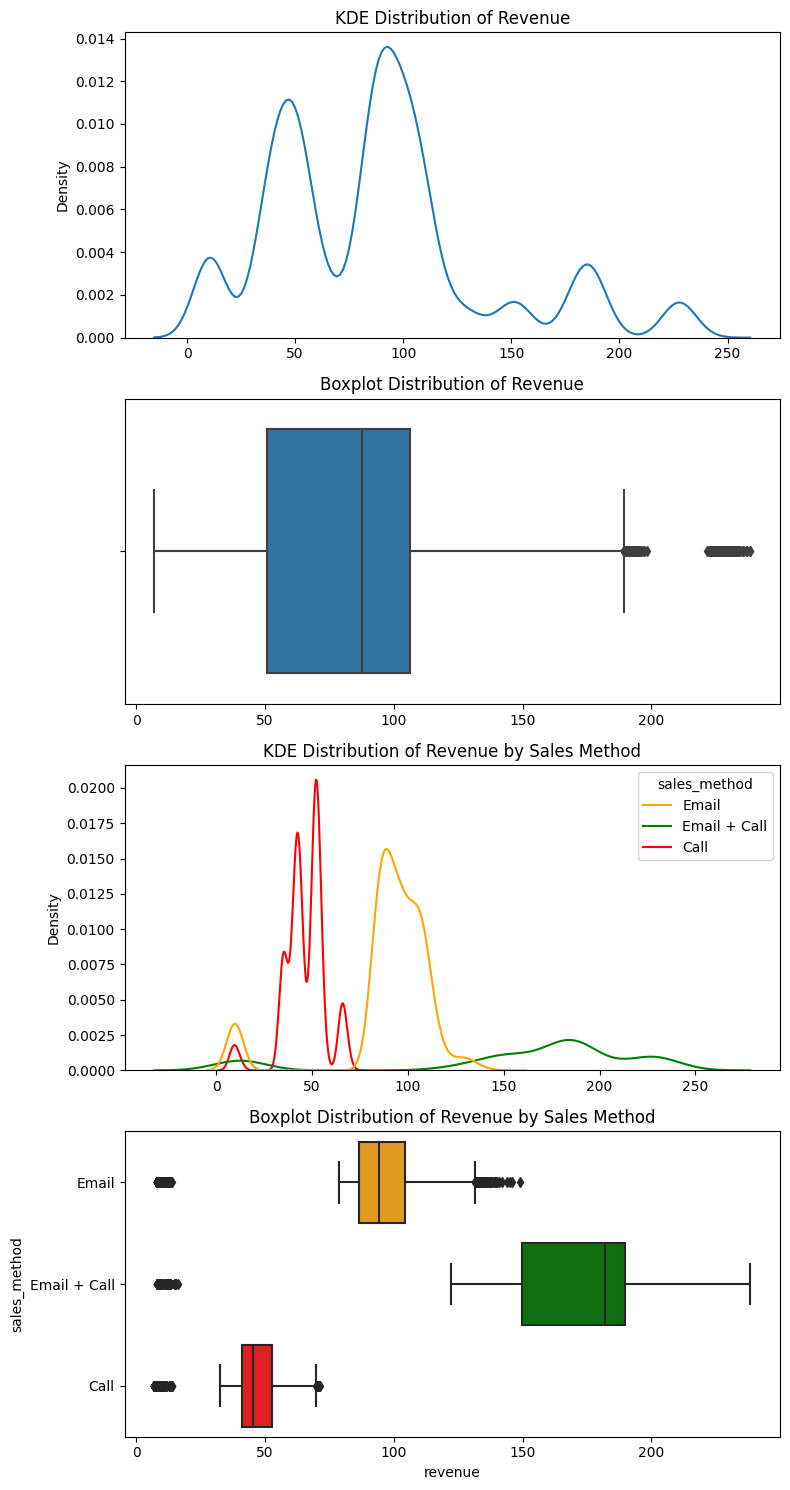

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the column of interest and the hue for distinction
column = 'revenue'
hue = 'sales_method'

# Function to compute and print percentiles
def print_percentiles(dataframe, column, percentile_lower, percentile_upper, hue=None):
    if hue:
        for category in dataframe[hue].unique():
            data_subset = dataframe[dataframe[hue]==category][column]
            lower, upper = np.percentile(data_subset, [percentile_lower, percentile_upper])

            print(f'\t\u2022 For "{category}", {percentile_upper - percentile_lower}% of the {column} falls between: ({lower:.2f}, {upper:.2f})')
    else:
        lower, upper = np.percentile(dataframe[column], [percentile_lower, percentile_upper])
        print(f'\t\u2022 Overall, {percentile_upper - percentile_lower}% of the {column} falls between: ({lower:.2f}, {upper:.2f})')

# Calculate and print the 95% and 50% intervals for the revenue overall and per sales method
print_percentiles(df, column, 2.5, 97.5)
print_percentiles(df, column, 2.5, 97.5, hue)
print_percentiles(df, column, 25, 75)
print_percentiles(df, column, 25, 75, hue)

# Create a 4x1 grid for subplots
fig, ax = plt.subplots(4, 1, figsize=(8, 15))

# KDE plot of 'revenue'
sns.kdeplot(data=df, x=column, ax=ax[0], palette=palette)
ax[0].set_title('KDE Distribution of Revenue')
ax[0].set_xlabel('')  # Remove x-label

# Boxplot of 'revenue'
sns.boxplot(data=df, x=column, ax=ax[1])
ax[1].set_title('Boxplot Distribution of Revenue')
ax[1].set_xlabel('')  # Remove x-label

# KDE plot of 'revenue' distinguished by 'sales_method'
sns.kdeplot(data=df, x=column, hue=hue, ax=ax[2], palette=palette)
ax[2].set_title('KDE Distribution of Revenue by Sales Method')
ax[2].set_xlabel('')  # Remove x-label

# Boxplot of 'revenue' distinguished by 'sales_method'
sns.boxplot(data=df, x=column, y=hue, ax=ax[3], palette=palette)
ax[3].set_title('Boxplot Distribution of Revenue by Sales Method')

# Adjust the layout for better visibility
plt.tight_layout()
plt.show()

## 3.4-Difference in Revenue over time for each of the Methods

Upon examining the temporal variations in revenue for each sales method, we observe that the 'email plus call' method consistently generates the highest average revenue, while the 'call' method results in the lowest. This pattern aligns with our previous analysis of overall revenue spread and its breakdown by sales methods.

One interesting trend to note here is that while 'email' has so far been the most profitable method, the trend appears to be on a decline. Meanwhile, the 'email plus call' method, which ranks second in terms of revenue generation, seems to be increasing in its yield.

Notably, despite the upward trend of 'calls', it remains the least profitable method. Moreover, its cost parallels that of 'email plus call', with email dispatch not incurring substantial costs. Consequently, the optimal sales method appears to be sending emails followed by calls.

However, we can also maintain the other two methods—'email' and 'call'—albeit at a reduced proportion. This approach provides room for adaptability should there be shifts in trend in the future.

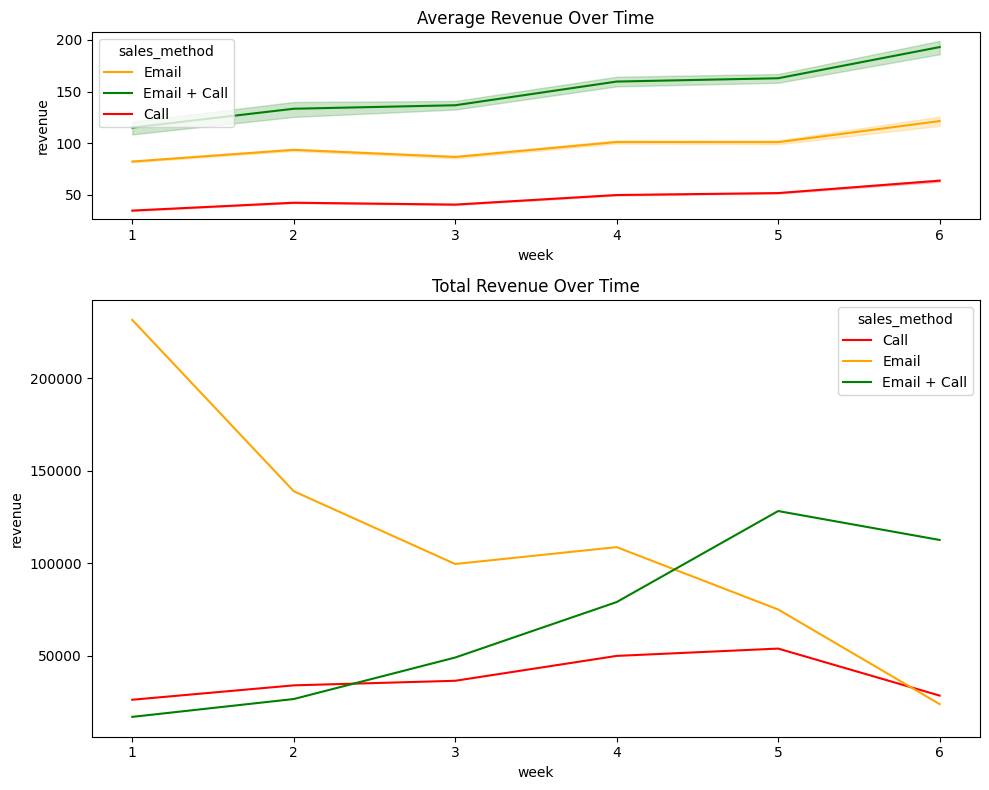

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by week and sales method, summing the revenue
df_sum = df.groupby(["week", "sales_method"])["revenue"].sum().reset_index()


# Prepare a 3-panel vertically stacked subplot
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={"height_ratios": (.3, .7)})

# Plot the average revenue over time on the first subplot
sns.lineplot(ax=ax[0], data=df, x="week", y="revenue", hue='sales_method', palette=palette)
ax[0].set_title('Average Revenue Over Time')


# Plot the total revenue over time on the third subplot
sns.lineplot(ax=ax[1], data=df_sum, x="week", y="revenue", hue='sales_method', palette=palette)
ax[1].set_title('Total Revenue Over Time')

# Display the plot
plt.tight_layout()
plt.show()


# 4-Findings

## 4.1-Customer Count and Revenue Distribution

The 'Email' method of sales attracted the highest number of customers and also generated the most revenue. However, despite a high customer count, the 'Call' method yielded the least revenue, indicating that it might not be as effective or efficient. The 'Email + Call' strategy, on the other hand, had fewer customers but outperformed the 'Call' strategy in terms of revenue, highlighting the impact and potential efficiency of combining email and call outreach.

## 4.2-Revenue Over Time

An analysis of revenue generation over time showed that while 'Email' has been the most profitable method so far, the revenue trend is on a decline. On the contrary, the 'Email + Call' method appears to be on the rise, offering promising prospects for future profitability. Even though there is an upward trend in the 'Call' method, it remains the least profitable among the three, suggesting it might be the least effective strategy.

# 5-Metrics

Given the findings, a recommended metric for the business to monitor would be the 'Revenue per Customer' for each sales method. This can be calculated by dividing the total revenue generated by a method by the number of customers that method has attracted.

This metric is crucial as it shows the effectiveness of each sales strategy on a per-customer basis, allowing the company to assess and compare the profitability of each method. It can help highlight which methods are most efficient in terms of revenue generation per customer and provide insights into where efforts and resources should be focused for maximum return.

For initial values based on the current data, the revenue per customer can be calculated as follows:

In [ ]:
# Group and aggregate data, then rename columns
kpi_df = df.groupby("sales_method").agg({"revenue":"sum", "customer_id":"count"}).rename(columns={"revenue": "Total Revenue", "customer_id": "Number of Customers"})

# Calculate Revenue Per Customer (RPC)
kpi_df['RPC'] = kpi_df["Total Revenue"] / kpi_df["Number of Customers"]

# Print RPC for each sales method
for method, row in kpi_df.iterrows():
    print(f'"{method}" RPC (Revenue per Customer) = Total Revenue / Number of Customers Acquired')
    print(f'\t\u2022 Initial value for the last 6 weeks period = {row["RPC"]:.2f}')
    print("")


"Call" RPC (Revenue per Customer) = Total Revenue / Number of Customers Acquired
	• Initial value for the last 6 weeks period = 46.22

"Email" RPC (Revenue per Customer) = Total Revenue / Number of Customers Acquired
	• Initial value for the last 6 weeks period = 90.76

"Email + Call" RPC (Revenue per Customer) = Total Revenue / Number of Customers Acquired
	• Initial value for the last 6 weeks period = 160.42



# 6-Final summary and Recommendations

In conclusion, based on our analysis of the data, we suggest the following courses of action:

Prioritizing the 'Email + Call' approach should be on the agenda, considering its escalating trend in revenue generation and a superior key performance indicator (KPI) of 160.42. Evidence indicates that this strategy outperforms the 'Call' approach in terms of revenue per customer, while requiring only a third of the time our team usually invests in the 'Call' method.

The dwindling revenue from the 'Email' strategy warrants further investigation to uncover the underlying causes. It is recommended to innovate and refresh our email marketing practices to enhance results.

Although the 'Call' method exhibits an upward trajectory, its profitability lags with an RPC KPI of just 46.22. It would be prudent to restrict or refine this approach for improved results, which could involve redefining the target audience for calls or enhancing the call scripts and methods.

Lastly, it is crucial for the company to consistently track the 'Revenue per Customer (RPC)' metric for each sales strategy. This will facilitate a comprehensive evaluation of their performance over time, thereby informing data-driven decisions on resource distribution and strategic planning.